<a href="https://colab.research.google.com/github/KristineYW/DS-Unit-2-Applied-Modeling/blob/master/Kristine_Wang_LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [112]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [113]:
# # Read New York City property sales data
# import pandas as pd
# df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [114]:
# Change column names: replace spaces with underscores

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sc1 = pd.read_csv('https://raw.githubusercontent.com/KristineYW/DS-Unit-2-Applied-Modeling/master/SCDB_2019_01_justiceCentered_LegalProvision_1.csv', encoding = "ISO-8859-1")

sc1.head()

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01-01-01,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01-01-02,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01-01-03,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01-01-04,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01-01-05,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
sc2 = pd.read_csv('https://raw.githubusercontent.com/KristineYW/DS-Unit-2-Applied-Modeling/master/SCDB_2019_01_justiceCentered_LegalProvision_2.csv', encoding = "ISO-8859-1")

sc2.head()

,ï»¿certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0
1,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0
2,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0
3,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0
4,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0


In [116]:
# Join the two large datasets into one dataframe

sc = pd.concat([sc1,sc2], axis=1)

sc.head()

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,firstAgreement,secondAgreement,ï»¿certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
0,1946-001,1946-001-01,1946-001-01-01-01-01,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0
1,1946-001,1946-001-01,1946-001-01-01-01-02,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0
2,1946-001,1946-001-01,1946-001-01-01-01-03,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0
3,1946-001,1946-001-01,1946-001-01-01-01-04,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0
4,1946-001,1946-001-01,1946-001-01-01-01-05,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0


In [117]:
sc = sc.drop(['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 
              'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 
              'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 
              'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 
              'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 
              'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54'], axis=1)

sc.head()

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,firstAgreement,secondAgreement,ï»¿certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
0,1946-001,1946-001-01,1946-001-01-01-01-01,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0
1,1946-001,1946-001-01,1946-001-01-01-01-02,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0
2,1946-001,1946-001-01,1946-001-01-01-01-03,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0
3,1946-001,1946-001-01,1946-001-01-01-01-04,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0
4,1946-001,1946-001-01,1946-001-01-01-01-05,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0


In [118]:
import datetime

In [119]:
sc['dateDecision'][7]

'11/18/46'

In [120]:
sc.sample(10)

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,firstAgreement,secondAgreement,ï»¿certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
112910,2009-077,2009-077-01,2009-077-01-04-01-09,6/21/10,1,177 L. Ed. 2d 355,2009,1703,Roberts,08-1498,"ERIC H. HOLDER, JR., ATTORNEY GENERAL, et al. ...",2/23/10,NaN,327.0,NaN,149.0,NaN,1,27.0,NaN,0.0,48.0,NaN,29.0,NaN,0.0,110.0,NaN,12.0,2.0,2.0,1.0,7.0,0.0,1.0,0.0,0.0,30060.0,3.0,1.0,0.0,1.0,NaN,2.0,201.0,NaN,111.0,111.0,1,6,3,113,SSotomayor,2.0,1.0,2.0,1.0
100301,1997-081,1997-081-02,1997-081-02-01-01-03,6/8/98,1,141 L. Ed. 2d 111,1997,1607,Rehnquist,96-8837,"DONALD E. CLEVELAND AND ENRIQUE GRAY-SANTANA, ...",3/23/98,NaN,100.0,NaN,27.0,NaN,1,NaN,NaN,0.0,80.0,NaN,21.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10440.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. Ã 924,110.0,103.0,1,5,4,104,SDOConnor,1.0,1.0,1.0,2.0
72342,1981-168,1981-168-03,1981-168-03-02-01-03,7/1/82,1,73 L. Ed. 2d 1042,1981,1507,Burger,80-1052,WINE & SPIRITS WHOLESALERS OF CALIFORNIA v. NO...,4/21/82,NaN,252.0,NaN,115.0,NaN,1,NaN,NaN,0.0,301.0,6.0,301.0,6.0,0.0,103.0,NaN,12.0,2.0,2.0,1.0,4.0,0.0,1.0,0.0,0.0,80110.0,8.0,1.0,0.0,2.0,NaN,2.0,230.0,NaN,102.0,99.0,1,9,0,95,BRWhite,4.0,1.0,1.0,2.0
89966,1989-126,1989-126-01,1989-126-01-01-01-04,6/25/90,1,111 L. Ed. 2d 224,1989,1603,Rehnquist,88-1503,"CRUZAN, BY HER PARENTS AND CO-GUARDIANS, CRUZA...",12/6/89,NaN,229.0,NaN,28.0,30.0,1,NaN,NaN,0.0,302.0,30.0,300.0,30.0,1.0,92.0,NaN,11.0,3.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,50030.0,5.0,1.0,0.0,2.0,NaN,2.0,230.0,NaN,102.0,102.0,1,5,4,100,HABlackmun,2.0,1.0,2.0,1.0
69626,1980-129,1980-129-01,1980-129-01-01-01-05,6/22/81,1,69 L. Ed. 2d 318,1980,1506,Burger,80-544,FIRST NATIONAL MAINTENANCE CORP. v. NATIONAL L...,4/21/81,NaN,151.0,NaN,382.0,NaN,1,82.0,NaN,0.0,22.0,NaN,22.0,NaN,1.0,NaN,NaN,3.0,2.0,2.0,1.0,4.0,0.0,1.0,0.0,0.0,70200.0,7.0,1.0,0.0,4.0,5.0,3.0,356.0,NaN,100.0,99.0,1,7,2,99,WEBurger,1.0,1.0,1.0,2.0
106558,2003-006,2003-006-10,2003-006-10-04-01-02,12/10/03,1,157 L. Ed. 2d 491,2003,1607,Rehnquist,02-1753,"CALIFORNIA DEMOCRATIC PARTY, et al. v. FEDERAL...",9/8/03,NaN,211.0,NaN,343.0,NaN,2,NaN,NaN,1.0,55.0,NaN,55.0,NaN,0.0,NaN,NaN,1.0,NaN,3.0,2.0,6.0,0.0,1.0,0.0,0.0,30140.0,3.0,2.0,0.0,1.0,NaN,2.0,212.0,NaN,103.0,103.0,1,5,4,103,JPStevens,1.0,3.0,2.0,2.0
29848,1962-127,1962-127-01,1962-127-01-02-01-08,6/3/63,1,10 L. Ed. 2d 542,1962,1408,Warren,8 ORIG,ARIZONA v. CALIFORNIA et al.,11/13/62,NaN,28.0,4.0,28.0,6.0,9,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,0.0,1.0,0.0,0.0,80130.0,8.0,2.0,0.0,4.0,7.0,5.0,510.0,NaN,78.0,78.0,1,5,3,88,TCClark,1.0,1.0,2.0,2.0
31879,1963-120,1963-120-01,1963-120-01-01-01-05,5/25/64,6,12 L. Ed. 2d 288,1963,1408,Warren,623,CALHOUN et al. v. LATIMER et al.,3/31/64,NaN,224.0,NaN,21.0,13.0,1,NaN,NaN,0.0,60.0,NaN,25.0,NaN,0.0,NaN,NaN,12.0,2.0,1.0,1.0,5.0,0.0,1.0,0.0,0.0,20050.0,2.0,2.0,0.0,7.0,3.0,NaN,NaN,NaN,NaN,90.0,1,9,0,92,WJBrennan,1.0,1.0,2.0,2.0
50186,1972-062,1972-062-01,1972-062-01-01-01-08,2/27/73,1,35 L. Ed. 2d 403,1972,1504,Burger,71-1136,TILLMAN et al. v. WHEATON-HAVEN RECREATION ASS...,11/15/72,NaN,222.0,NaN,131.0,NaN,1,NaN,NaN,0.0,79.0,NaN,24.0,NaN,1.0,NaN,NaN,11.0,2.0,1.0,1.0,4.0,0.0,1.0,0.0,0.0,20040.0,2.0,2.0,0.0,4.0,NaN,3.0,313.0,NaN,100.0,99.0,1,9,0,101,LFPowell,1.0,1.0,2.0,2.0
109074,2005-060,2005-060-01,2005-060-01-01-01-03,6/5/06,1,164 L. Ed. 2d 749,2005,1702,Roberts,May-92,JACOB ZEDNER v. UNITED STA

In [121]:
sc['justiceName'].value_counts()

WJBrennan       8183
BRWhite         7555
WHRehnquist     6778
WODouglas       6318
JPStevens       6288
TMarshall       5949
HABlackmun      5712
PStewart        5506
HLBlack         5280
SDOConnor       4298
WEBurger        4258
LFPowell        4070
AScalia         4020
AMKennedy       3951
JHarlan2        3627
TCClark         3554
EWarren         3405
CThomas         3228
FFrankfurter    3107
RBGinsburg      2878
SGBreyer        2739
DHSouter        2434
HHBurton        2327
SFReed          1942
RHJackson       1587
FMVinson        1442
JGRoberts       1357
SAAlito         1326
SMinton         1158
CEWhittaker     1065
SSotomayor       955
AFortas          951
EKagan           838
WBRutledge       723
FMurphy          723
AJGoldberg       718
NMGorsuch        228
BMKavanaugh       80
Name: justiceName, dtype: int64

In [122]:
# Change dateDecision to datetime data type 


def yearConvert(date):
    year_int = int(date[-2:])
    if year_int > 20:
        edited_str = date[:-2] + '19' + date[-2:]
    else:
        edited_str = date[:-2] + '20' + date[-2:]
    return(pd.to_datetime(edited_str))
sc['dateDecision'] = [yearConvert(i) for i in sc['dateDecision']]
sc['dateDecision'].describe

Exception ignored in: <function Booster.__del__ at 0x1266a4560>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


<bound method NDFrame.describe of 0        1946-11-18
1        1946-11-18
2        1946-11-18
3        1946-11-18
4        1946-11-18
            ...    
120553   2019-05-28
120554   2019-05-28
120555   2019-05-28
120556   2019-05-28
120557   2019-05-28
Name: dateDecision, Length: 120558, dtype: datetime64[ns]>

In [123]:
# Introduce new features for senate majority party and presidential party


sc['partyOfPresident'] = np.where((sc['dateDecision'] < '1953-01-19') | ('1961-01-20' < sc['dateDecision']) & (sc['dateDecision'] < '1969-01-19') | 
                                  ('1977-01-20' < sc['dateDecision']) & (sc['dateDecision'] < '1981-01-19') | 
                                  ('1993-01-20' < sc['dateDecision']) & (sc['dateDecision'] < '2001-01-19') | 
                                  ('2009-01-20' < sc['dateDecision']) & (sc['dateDecision'] < '2017-01-20'), 
                                  'Democrat','Republican')

In [124]:
sc['partyOfAppointing'] = np.where((sc['justiceName'] == 'BRWhite') | (sc['justiceName'] == 'WODouglas') | (sc['justiceName'] == 'Tmarshall') | 
                                (sc['justiceName'] == 'HLBlack') | (sc['justiceName'] == 'TCClark') | (sc['justiceName'] == 'Ffrankfurter') | 
                                (sc['justiceName']== 'RBGinsburg') | (sc['justiceName'] == 'SGBreyer') | (sc['justiceName'] == 'HHBurton') | 
                                (sc['justiceName'] == 'SFReed') | (sc['justiceName'] == 'RHJackson') | (sc['justiceName'] == 'FMVinson') | 
                                (sc['justiceName'] == 'Sminton') | (sc['justiceName'] == 'Ssotomayor') | (sc['justiceName'] == 'Afortas') | 
                                (sc['justiceName'] == 'Ekagan') | (sc['justiceName'] == 'Fmurphy') | (sc['justiceName'] == 'WBRutledge') | 
                                (sc['justiceName'] == 'AJGoldberg'), 'Democrat','Republican' )

In [125]:
sc.head()

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,firstAgreement,secondAgreement,ï»¿certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,partyOfPresident,partyOfAppointing
0,1946-001,1946-001-01,1946-001-01-01-01-01,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0,Democrat,Democrat
1,1946-001,1946-001-01,1946-001-01-01-01-02,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0,Democrat,Democrat
2,1946-001,1946-001-01,1946-001-01-01-01-03,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0,Democrat,Democrat
3,1946-001,1946-001-01,1946-001-01-01-01-04,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,Democrat,Republican
4,1946-001,1946-001-01,1946-001-01-01-01-05,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0,Democrat,Democrat


In [126]:
sc['partyOfPresident'].value_counts(normalize=True)

Republican    0.551909
Democrat      0.448091
Name: partyOfPresident, dtype: float64

In [127]:
sc['partyOfSenate'] = np.where((sc['dateDecision'] < '1947-01-03') | ('1949-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '1953-01-02') | 
                                  ('1955-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '1981-01-02') | 
                                  ('1987-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '1995-01-02') |
                                  ('2001-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '2002-11-11') | 
                                  ('2007-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '2017-01-02'),
                                  'Democrat','Republican')

sc['partyOfSenate'].value_counts(normalize=True)

Democrat      0.712404
Republican    0.287596
Name: partyOfSenate, dtype: float64

In [128]:
sc.head()

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,firstAgreement,secondAgreement,ï»¿certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,partyOfPresident,partyOfAppointing,partyOfSenate
0,1946-001,1946-001-01,1946-001-01-01-01-01,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0,Democrat,Democrat,Democrat
1,1946-001,1946-001-01,1946-001-01-01-01-02,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
2,1946-001,1946-001-01,1946-001-01-01-01-03,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
3,1946-001,1946-001-01,1946-001-01-01-01-04,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,Democrat,Republican,Democrat
4,1946-001,1946-001-01,1946-001-01-01-01-05,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat


In [129]:
pd.set_option('display.max_columns',100)
    
sc.head(10)

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,firstAgreement,secondAgreement,ï»¿certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,partyOfPresident,partyOfAppointing,partyOfSenate
0,1946-001,1946-001-01,1946-001-01-01-01-01,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0,Democrat,Democrat,Democrat
1,1946-001,1946-001-01,1946-001-01-01-01-02,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
2,1946-001,1946-001-01,1946-001-01-01-01-03,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
3,1946-001,1946-001-01,1946-001-01-01-01-04,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,Democrat,Republican,Democrat
4,1946-001,1946-001-01,1946-001-01-01-01-05,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
5,1946-001,1946-001-01,1946-001-01-01-01-06,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,78,HLBlack,1.0,2.0,2.0,2.0,Democrat,Democrat,Democrat
6,1946-001,1946-001-01,1946-001-01-01-01-07,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,85,WBRutledge,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
7,1946-001,1946-001-01,1946-001-01-01-01-08,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,82,FMurphy,1.0,1.0,2.0,2.0,Democrat,Republican,Democrat
8,1946-001,1946-001-01,1946-001-01-01-01-09,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN

In [130]:
sc['term'].value_counts()

1967    2943
1986    2583
1946    2556
1975    2496
1973    2448
        ... 
2017     801
2007     790
2014     783
2016     747
2018     720
Name: term, Length: 73, dtype: int64

In [131]:
# Retrain features to be categorical for OneHotEncoding

all_columns = list(sc)
sc[all_columns] = sc[all_columns].astype(str)

In [132]:
# Drop repetitive columns 

# sc = sc.drop(['caseName','ledCite','dateArgument','dateRearg'], axis=1)

In [133]:
sc['direction'].value_counts(normalize=True)

2.0    0.496666
1.0    0.447419
nan    0.055915
Name: direction, dtype: float64

In [134]:
sc['direction'] = sc['direction'].replace({'nan':'-1'})

In [135]:
sc['direction'].value_counts(normalize=True)

2.0    0.496666
1.0    0.447419
-1     0.055915
Name: direction, dtype: float64

In [136]:
sc['partyOfPresident'].value_counts(normalize=True)

Republican    0.551909
Democrat      0.448091
Name: partyOfPresident, dtype: float64

In [137]:
sc['partyOfSenate'].value_counts(normalize=True)

Democrat      0.712404
Republican    0.287596
Name: partyOfSenate, dtype: float64

In [138]:
sc.isnull().sum()

caseId                      0
docketId                    0
voteId                      0
dateDecision                0
decisionType                0
ledCite                     0
term                        0
naturalCourt                0
chief                       0
docket                      0
caseName                    0
dateArgument                0
dateRearg                   0
petitioner                  0
petitionerState             0
respondent                  0
respondentState             0
jurisdiction                0
adminAction                 0
adminActionState            0
threeJudgeFdc               0
caseOrigin                  0
caseOriginState             0
caseSource                  0
caseSourceState             0
lcDisagreement              0
firstAgreement              0
secondAgreement             0
ï»¿certReason               0
lcDisposition               0
lcDispositionDirection      0
declarationUncon            0
caseDisposition             0
caseDispos

In [139]:
sc = sc.fillna(0)

In [140]:
# Drop all outcome variables

sc = sc.drop(['decisionDirection', 'partyWinning','majVotes','minVotes','majority','decisionType','declarationUncon',
              'caseDispositionUnusual','precedentAlteration','voteUnclear','majOpinWriter','majOpinAssigner',
              'splitVote','vote','opinion','majority','firstAgreement','secondAgreement'], axis=1)

In [141]:
sc.shape

(120558, 43)

In [142]:
# Split the dataframe into train and test sets 

from sklearn.model_selection import train_test_split

train, test = train_test_split(sc, train_size=0.9, test_size=0.10, 
                              stratify=sc['direction'], random_state=42)

In [143]:
train, val = train_test_split(train, train_size=0.85, test_size=0.15, 
                              stratify=train['direction'], random_state=42)

In [144]:
train.shape, val.shape, test.shape

((92226, 43), (16276, 43), (12056, 43))

In [145]:
# Define target feature

target = 'direction'

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [146]:
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [147]:
# ### fit_transfom on train, transform on val
# from xgboost import XGBClassifier

# encoder = ce.OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)
# X_val_encoded = encoder.transform(X_val)

# model = XGBClassifier(
#     n_estimators=1000,  # <= 1000 trees, depends on early stopping
#     max_depth=7,        # try deeper trees because of high cardinality categoricals
#     learning_rate=0.5,  # try higher learning rate
#     n_jobs=-1
# )

# eval_set = [(X_train_encoded, y_train), 
#             (X_val_encoded, y_val)]

# model.fit(X_train_encoded, y_train, 
#           eval_set=eval_set,
#           eval_metric='merror', 
#           early_stopping_rounds=50) # Stop if the score hasn't improved in 50 rounds

[0]	validation_0-merror:0.248401	validation_1-merror:0.252826
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.239238	validation_1-merror:0.24232
[2]	validation_0-merror:0.230878	validation_1-merror:0.236483
[3]	validation_0-merror:0.223831	validation_1-merror:0.229295
[4]	validation_0-merror:0.219483	validation_1-merror:0.227329
[5]	validation_0-merror:0.214245	validation_1-merror:0.224625
[6]	validation_0-merror:0.212359	validation_1-merror:0.221676
[7]	validation_0-merror:0.208206	validation_1-merror:0.219218
[8]	validation_0-merror:0.202676	validation_1-merror:0.215778
[9]	validation_0-merror:0.19874	validation_1-merror:0.214242
[10]	validation_0-merror:0.195509	validation_1-merror:0.211047
[11]	validation_0-merror:0.192408	validation_1-merror:0.209327
[12]	validation_0-merror:0.188602	validation_1-merror:0.206685
[13]	validation_0-merror:0.186

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

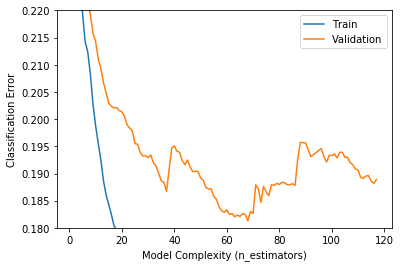

In [148]:
# results = model.evals_result()
# train_error = results['validation_0']['merror']
# val_error = results['validation_1']['merror']
# epoch = range(1, len(train_error)+1)
# plt.plot(epoch, train_error, label='Train')
# plt.plot(epoch, val_error, label='Validation')
# plt.ylabel('Classification Error')
# plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.18, 0.22)) # Zoom in
# plt.legend();

In [149]:
1 - 0.18131

0.81869

In [104]:
def encoder(df):
  target = 'direction'
  if target in df.columns:
    df_features = df.drop(columns=[target])
  else:
    df_features = df
  numeric_features = df_features.select_dtypes(include='number')
  categorical = df_features.select_dtypes(exclude='number').nunique()
  cat_features = categorical[categorical <= 3].index.tolist()
  high_cardinality_features = pd.DataFrame(categorical[categorical > 3])
  df_high = df[high_cardinality_features.T.columns]
  one_hot_encode = ce.OneHotEncoder(use_cat_names=True)
  one_hot_encode.fit(df[cat_features])
  low_cardinality_features = one_hot_encode.transform(df[cat_features])
  df1 = numeric_features.join(low_cardinality_features, how='outer')
  df2 = df1.join(df_high, how='outer')


  return df2

In [105]:
X_train = encoder(train)

X_train.head()

,threeJudgeFdc_0.0,threeJudgeFdc_1.0,threeJudgeFdc_nan,lcDisagreement_1.0,lcDisagreement_0.0,lcDisagreement_nan,decisionDirectionDissent_0.0,decisionDirectionDissent_1.0,decisionDirectionDissent_nan,partyOfPresident_Democrat,partyOfPresident_Republican,partyOfAppointing_Democrat,partyOfAppointing_Republican,partyOfSenate_Democrat,partyOfSenate_Republican,caseId,docketId,voteId,dateDecision,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,caseOrigin,caseOriginState,caseSource,caseSourceState,ï»¿certReason,lcDisposition,lcDispositionDirection,caseDisposition,issue,issueArea,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,justice,justiceName
27533,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1961-092,1961-092-01,1961-092-01-01-01-06,1962-06-11,8 L. Ed. 2d 407,1961,1407,Warren,604,PORTER v. AETNA CASUALTY & SURETY CO.,4/25/62,nan,250.0,nan,135.0,nan,1,nan,nan,55.0,nan,32.0,nan,10.0,3.0,1.0,3.0,20250.0,2.0,4.0,nan,6.0,600.0,38 U.S.C. Ã 3101,95,BRWhite
3978,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1947-091,1947-091-01,1947-091-01-03-01-01,1948-06-07,92 L. Ed. 2d 1460,1947,1301,Vinson,415,TOOMER et al. v. WITSELL et al.,1/13/48,nan,157.0,nan,19.0,48.0,2,nan,nan,155.0,48.0,155.0,48.0,1.0,nan,1.0,6.0,20220.0,2.0,2.0,nan,1.0,144.0,nan,86,HHBurton
91670,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1991-003,1991-003-06,1991-003-06-01-01-02,1991-11-04,116 L. Ed. 2d 293,1991,1605,Rehnquist,91-5246,"JAMES L. MARTIN v. EDWARD C. SMITH, et al.",nan,nan,111.0,nan,501.0,nan,5,nan,nan,nan,nan,nan,nan,1.0,nan,1.0,9.0,20360.0,2.0,4.0,nan,4.0,403.0,nan,100,HABlackmun
113360,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,2010-021,2010-021-01,2010-021-01-01-01-09,2011-03-01,179 L. Ed. 2d 144,2010,1704,Roberts,09-400,"VINCENT E. STAUB, PETITIONER v. PROCTOR HOSPITAL",11/2/10,nan,250.0,nan,151.0,nan,1,nan,nan,65.0,nan,27.0,nan,12.0,3.0,1.0,4.0,20060.0,2.0,4.0,nan,6.0,600.0,38 USCA 4311,114,EKagan
97655,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1995-050,1995-050-01,1995-050-01-01-01-03,1996-05-13,134 L. Ed. 2d 748,1995,1607,Rehnquist,95-323,"UNITED STATES v. THOMAS R. NOLAND, TRUSTEE FOR...",3/25/96,nan,27.0,nan,114.0,nan,1,nan,nan,104.0,nan,26.0,nan,11.0,2.0,1.0,4.0,120030.0,12.0,4.0,nan,3.0,307.0,nan,104,SDOConnor


In [106]:
X_val = encoder(val)

X_val.head()

,threeJudgeFdc_0.0,threeJudgeFdc_1.0,threeJudgeFdc_nan,lcDisagreement_0.0,lcDisagreement_1.0,lcDisagreement_nan,decisionDirectionDissent_0.0,decisionDirectionDissent_1.0,decisionDirectionDissent_nan,partyOfPresident_Republican,partyOfPresident_Democrat,partyOfAppointing_Republican,partyOfAppointing_Democrat,partyOfSenate_Republican,partyOfSenate_Democrat,caseId,docketId,voteId,dateDecision,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,caseOrigin,caseOriginState,caseSource,caseSourceState,ï»¿certReason,lcDisposition,lcDispositionDirection,caseDisposition,issue,issueArea,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,justice,justiceName
78603,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1984-116,1984-116-02,1984-116-02-01-01-09,1985-06-04,86 L. Ed. 2d 81,1984,1507,Burger,83-6381,"PARKER et al. v. BLOCK, SECRETARY OF AGRICULTU...",11/27/84,nan,212.0,nan,304.0,nan,1,117.0,26.0,80.0,nan,21.0,nan,12.0,2.0,1.0,3.0,40010.0,4.0,2.0,nan,2.0,230.0,nan,104,SDOConnor
21902,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1958-082,1958-082-01,1958-082-01-01-01-03,1959-05-04,3 L. Ed. 2d 865,1958,1406,Warren,51,SCULL v. VIRGINIA ex rel. COMMITTEE ON LAW REF...,11/18/58,nan,254.0,nan,17.0,55.0,1,nan,nan,302.0,55.0,300.0,55.0,11.0,2.0,1.0,3.0,30050.0,3.0,2.0,nan,2.0,230.0,nan,81,WODouglas
9529,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1950-095,1950-095-01,1950-095-01-01-01-08,1951-06-04,95 L. Ed. 2d 1284,1950,1303,Vinson,393,NATIONAL LABOR RELATIONS BOARD v. DENVER BUILD...,2/27/51,nan,382.0,nan,249.0,nan,1,82.0,nan,32.0,nan,32.0,nan,12.0,8.0,2.0,3.0,70150.0,7.0,5.0,4.0,3.0,350.0,nan,78,HLBlack
73856,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1982-098,1982-098-02,1982-098-02-01-01-05,1983-06-06,76 L. Ed. 2d 437,1982,1507,Burger,82-545,UNITED STATES NUCLEAR REGULATORY COMMISSION et...,4/19/83,nan,385.0,nan,150.0,nan,1,85.0,nan,32.0,nan,32.0,nan,12.0,nan,2.0,3.0,80130.0,8.0,5.0,4.0,3.0,354.0,nan,100,HABlackmun
27452,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1961-085,1961-085-01,1961-085-01-01-01-06,1962-05-28,8 L. Ed. 2d 321,1961,1407,Warren,648,"BEARD v. STAHR, SECRETARY OF THE ARMY, et al.",nan,nan,186.0,nan,306.0,nan,2,6.0,nan,55.0,nan,32.0,nan,1.0,2.0,2.0,5.0,20240.0,2.0,3.0,nan,nan,nan,nan,91,JHarlan2


In [107]:
X_train.shape

(92226, 51)

In [108]:
X_val.shape

(16276, 51)

In [109]:
# set(X_train.columns).symmetric_difference(set(X_val.columns))

In [110]:
# set(X_train.columns).intersection(set(X_val.columns))

In [43]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7536864094372081


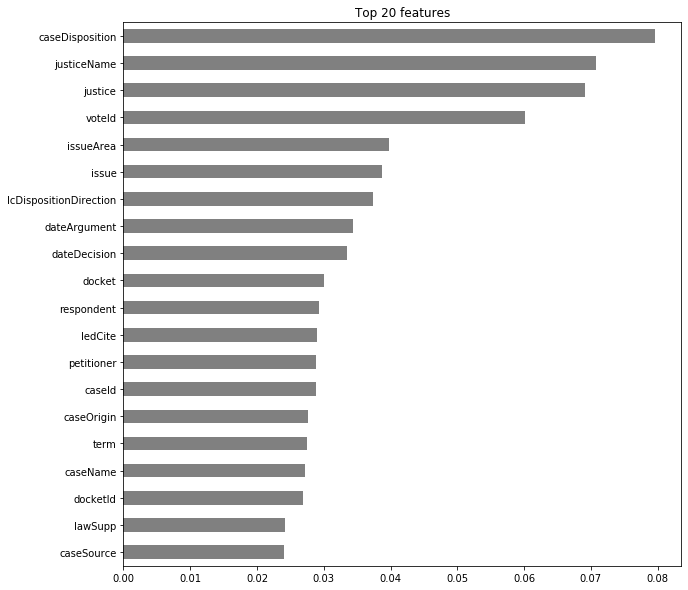

In [44]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [45]:
# # Try permutation importance for feature importance

# feature = 'decisionDirection'
# X_val_permuted = X_val.copy()
# X_val_permuted[feature] = np.random.permutation(X_val[feature])

# score_with = pipeline.score(X_val, y_val)
# score_permuted = pipeline.score(X_val_permuted, y_val) 

# print(f'Validation Accuracy with {feature}: {score_with}')
# print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
# print(f'Permutation Importance: {score_with - score_permuted}')

In [46]:
feature = 'justiceName'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

score_with = pipeline.score(X_val, y_val)
score_permuted = pipeline.score(X_val_permuted, y_val) 

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with justiceName: 0.7536864094372081
Validation Accuracy with justiceName permuted: 0.7300319488817891
Permutation Importance: 0.023654460555418977


In [50]:
feature = 'partyOfPresident_Democrat'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

score_with = pipeline.score(X_val, y_val)
score_permuted = pipeline.score(X_val_permuted, y_val) 

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with partyOfPresident_Democrat: 0.7536864094372081
Validation Accuracy with partyOfPresident_Democrat permuted: 0.7555296141558122
Permutation Importance: -0.0018432047186041078


In [48]:
feature = 'partyOfPresident_Republican'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

score_with = pipeline.score(X_val, y_val)
score_permuted = pipeline.score(X_val_permuted, y_val) 

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with partyOfPresident_Republican: 0.7536864094372081
Validation Accuracy with partyOfPresident_Republican permuted: 0.7534406488080609
Permutation Importance: 0.00024576062914716257


In [51]:
feature = 'partyOfSenate_Republican'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

score_with = pipeline.score(X_val, y_val)
score_permuted = pipeline.score(X_val_permuted, y_val) 

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with partyOfSenate_Republican: 0.7536864094372081
Validation Accuracy with partyOfSenate_Republican permuted: 0.7547923322683706
Permutation Importance: -0.0011059228311625091


In [52]:
feature = 'partyOfSenate_Democrat'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

score_with = pipeline.score(X_val, y_val)
score_permuted = pipeline.score(X_val_permuted, y_val) 

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with partyOfSenate_Democrat: 0.7536864094372081
Validation Accuracy with partyOfSenate_Democrat permuted: 0.7547923322683706
Permutation Importance: -0.0011059228311625091


In [53]:
feature = 'caseDisposition'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

score_with = pipeline.score(X_val, y_val)
score_permuted = pipeline.score(X_val_permuted, y_val) 

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with caseDisposition: 0.7536864094372081
Validation Accuracy with caseDisposition permuted: 0.6439542885229786
Permutation Importance: 0.10973212091422946


In [54]:
# Use eli5 library

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [57]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,  
    random_state=42  
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [58]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(
    ascending=False)

lcDispositionDirection          0.134112
caseDisposition                 0.109929
justiceName                     0.021148
issueArea                       0.016896
justice                         0.013210
chief                           0.011182
respondent                      0.009191
issue                           0.008110
dateArgument                    0.006119
docket                          0.006046
authorityDecision1              0.005321
lawType                         0.005136
naturalCourt                    0.004645
petitionerState                 0.004129
petitioner                      0.003785
caseSource                      0.003637
ledCite                         0.003564
caseOrigin                      0.003416
dateDecision                    0.002949
caseId                          0.002888
ï»¿certReason                   0.002826
adminAction                     0.002789
lcDisposition                   0.002531
term                            0.002187
respondentState 

In [59]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1341 ± 0.0051,lcDispositionDirection
0.1099 ± 0.0073,caseDisposition
0.0211 ± 0.0029,justiceName
0.0169 ± 0.0009,issueArea
0.0132 ± 0.0029,justice
0.0112 ± 0.0020,chief
0.0092 ± 0.0024,respondent
0.0081 ± 0.0032,issue
0.0061 ± 0.0016,dateArgument
0.0060 ± 0.0023,docket


In [60]:
minimum_importance = 0
mask = (permuter.feature_importances_ - permuter.feature_importances_std_) > minimum_importance
mask

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True])

In [61]:
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_train_selected.shape

(92226, 29)

In [62]:
X_val_selected = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train_selected, y_train)
print('Validation Accuracy', pipeline.score(X_val_selected, y_val))

Validation Accuracy 0.8352789383140821


In [63]:
X_train_selected.columns

Index(['decisionDirectionDissent_0.0', 'caseId', 'dateDecision', 'ledCite',
       'term', 'naturalCourt', 'chief', 'docket', 'dateArgument', 'petitioner',
       'petitionerState', 'respondent', 'respondentState', 'adminAction',
       'adminActionState', 'caseOrigin', 'caseSource', 'ï»¿certReason',
       'lcDisposition', 'lcDispositionDirection', 'caseDisposition', 'issue',
       'issueArea', 'authorityDecision1', 'authorityDecision2', 'lawType',
       'lawSupp', 'justice', 'justiceName'],
      dtype='object')

In [64]:
X_train_selected.head()

,decisionDirectionDissent_0.0,caseId,dateDecision,ledCite,term,naturalCourt,chief,docket,dateArgument,petitioner,petitionerState,respondent,respondentState,adminAction,adminActionState,caseOrigin,caseSource,ï»¿certReason,lcDisposition,lcDispositionDirection,caseDisposition,issue,issueArea,authorityDecision1,authorityDecision2,lawType,lawSupp,justice,justiceName
27533,1,1961-092,1962-06-11,8 L. Ed. 2d 407,1961,1407,Warren,604,4/25/62,250.0,nan,135.0,nan,nan,nan,55.0,32.0,10.0,3.0,1.0,3.0,20250.0,2.0,4.0,nan,6.0,600.0,95,BRWhite
3978,1,1947-091,1948-06-07,92 L. Ed. 2d 1460,1947,1301,Vinson,415,1/13/48,157.0,nan,19.0,48.0,nan,nan,155.0,155.0,1.0,nan,1.0,6.0,20220.0,2.0,2.0,nan,1.0,144.0,86,HHBurton
91670,1,1991-003,1991-11-04,116 L. Ed. 2d 293,1991,1605,Rehnquist,91-5246,nan,111.0,nan,501.0,nan,nan,nan,nan,nan,1.0,nan,1.0,9.0,20360.0,2.0,4.0,nan,4.0,403.0,100,HABlackmun
113360,1,2010-021,2011-03-01,179 L. Ed. 2d 144,2010,1704,Roberts,09-400,11/2/10,250.0,nan,151.0,nan,nan,nan,65.0,27.0,12.0,3.0,1.0,4.0,20060.0,2.0,4.0,nan,6.0,600.0,114,EKagan
97655,1,1995-050,1996-05-13,134 L. Ed. 2d 748,1995,1607,Rehnquist,95-323,3/25/96,27.0,nan,114.0,nan,nan,nan,104.0,26.0,11.0,2.0,1.0,4.0,120030.0,12.0,4.0,nan,3.0,307.0,104,SDOConnor


In [ ]:
# Get Pandas Profiling Report

# !pip install pandas-profiling==2.*


In [ ]:
# Write a function to add column with party in power information 



In [ ]:
# # Check out the profile 

# from pandas_profiling import ProfileReport

# profile = ProfileReport(sc)

# profile.to_file(output_file='output.html')

In [ ]:
# from google.colab import files
# files.download('output.html')

In [ ]:
# Keep just the subset of data for the Tribeca neighborhood
# Check how many rows you have now. (Should go down from > 20k rows to 146)


In [ ]:
# Q. What's the date range of these property sales in Tribeca?


In [ ]:
# The Pandas Profiling Report showed that SALE_PRICE was read as strings
# Convert it to integers


In [ ]:
# Q. What is the maximum SALE_PRICE in this dataset?


In [ ]:
# Look at the row with the max SALE_PRICE


In [ ]:
# Get value counts of TOTAL_UNITS
# Q. How many property sales were for multiple units?


In [ ]:
# Keep only the single units


In [ ]:
# Q. Now what is the max sales price? How many square feet does it have?


In [ ]:
# Q. How often did $0 sales occur in this subset of the data?

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:
# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 



In [ ]:
# Look at property sales for > 5,000 square feet
# Q. What is the highest square footage you see?


In [ ]:
# What are the building class categories?
# How frequently does each occur?


In [ ]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

# Check how many rows you have now. (Should be 106 rows.)


In [ ]:
# Make a Plotly Express scatter plot of GROSS_SQUARE_FEET vs SALE_PRICE


In [ ]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"


In [ ]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in total?
# Is this dirty data?


In [ ]:
# Make a judgment call:
# Keep rows where sale price was < $35 million

# Check how many rows you have now. (Should be down to 90 rows.)


In [ ]:
# Now that you've removed outliers,
# Look again at a scatter plot with OLS (Ordinary Least Squares) trendline


In [ ]:
# Select these columns, then write to a csv file named tribeca.csv. Don't include the index.
